<b>This notebook is the results of my data cleaning of the Ames, Iowa housing data set. Subsequent exploratory analysis, feature engineering and modeling is available in the models notebook.</b>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
%matplotlib inline

## Preliminary Exploration

In [3]:
train = pd.read_csv('./datasets/train.csv') #read in training %set_env

In [4]:
test = pd.read_csv('./datasets/test.csv') #read in testing set

In [5]:
train.shape #checking shape

(2051, 81)

In [6]:
test.shape

(878, 80)

In [7]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


I am familiarizing myself wit the data. Checking for how big the dataset it, missing values, and which features will need to be changed in some way.

In [8]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [9]:
train.isnull().sum().sort_values(ascending = False)[0:30] #checking for null values

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Finish      114
Garage Cond        114
Garage Qual        114
Garage Yr Blt      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Cars          1
Garage Area          1
Bsmt Unf SF          1
BsmtFin SF 2         1
Total Bsmt SF        1
BsmtFin SF 1         1
Overall Cond         0
Exterior 2nd         0
Exterior 1st         0
Roof Matl            0
dtype: int64

In [10]:
train.columns #columns in our dataset

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [11]:
train['Pool QC'].value_counts().sort_values(ascending=False)

Gd    4
Fa    2
TA    2
Ex    1
Name: Pool QC, dtype: int64

In [12]:
train['Misc Feature'].value_counts().sort_values(ascending=False)[0:30]

Shed    56
Gar2     4
Othr     3
TenC     1
Elev     1
Name: Misc Feature, dtype: int64

I want to check the distribution of prices because this may end up being important later while modeling.

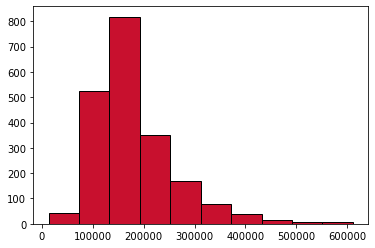

In [13]:
train['SalePrice'].hist(grid=False, color='#C8102E', edgecolor="#000000")

## Examining bathroom variables and creating new features

Bathroom related features can be changed to include tallies of all types of bathrooms. I will deal with half bathrooms in two ways to account for my lack of knowledge of how half bathrooms are valued.

In [14]:
[col for col in train.columns if 'Bath' in col]

['Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath']

In [15]:
bath_cols = ['Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath']
[train.columns.get_loc(col) for col in bath_cols]

[48, 49, 50, 51]

In [16]:
train["Total Bath"] = train.apply(lambda row: row['Bsmt Full Bath': 'Half Bath'].sum(),axis=1)
test["Total Bath"] = test.apply(lambda row: row['Bsmt Full Bath': 'Half Bath'].sum(),axis=1)

In [17]:
train[['Total Bath', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath']].head()

,Total Bath,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath
0,3.0,0.0,0.0,2,1
1,4.0,1.0,0.0,2,1
2,2.0,1.0,0.0,1,0
3,3.0,0.0,0.0,2,1
4,2.0,0.0,0.0,2,0


In [18]:
train['Half Bath'] = train['Half Bath']/2
train['Bsmt Half Bath'] = train['Bsmt Half Bath']/2

test['Half Bath'] = test['Half Bath']/2
test['Bsmt Half Bath'] = test['Bsmt Half Bath']/2

In [19]:
train[['Total Bath', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath']].head()

,Total Bath,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath
0,3.0,0.0,0.0,2,0.5
1,4.0,1.0,0.0,2,0.5
2,2.0,1.0,0.0,1,0.0
3,3.0,0.0,0.0,2,0.5
4,2.0,0.0,0.0,2,0.0


In [20]:
train["Total Bath Adj"] = train.apply(lambda row: row['Bsmt Full Bath': 'Half Bath'].sum(),axis=1)
test["Total Bath Adj"] = test.apply(lambda row: row['Bsmt Full Bath': 'Half Bath'].sum(),axis=1)

In [21]:
train[['Total Bath Adj', 'Total Bath']].head()

,Total Bath Adj,Total Bath
0,2.5,3.0
1,3.5,4.0
2,2.0,2.0
3,2.5,3.0
4,2.0,2.0


I don't know how much weight a half bath carries, does it equate to half the price? I want to add this adjusted feature in there to see if it's closer to the weight of a full bath or if half baths are worth half a full. I will make sure to do both tasks for training and testing data so that both datasets are similarly constructed with the same feature changes.

In [22]:
train["total_inside_sf"] = train.apply(lambda row: row['Total Bsmt SF'] + row['Gr Liv Area'], axis=1)
test["total_inside_sf"] = test.apply(lambda row: row['Total Bsmt SF'] + row['Gr Liv Area'], axis=1)
#creation of variable for total inside square feet

In [23]:
train["total_outside_sf"] = train.apply(lambda row: row['Wood Deck SF'] + row['Open Porch SF'] + row['Enclosed Porch'] + row['3Ssn Porch'] + row['Screen Porch'] +row['Pool Area'], axis=1)
test["total_outside_sf"] = test.apply(lambda row: row['Wood Deck SF'] + row['Open Porch SF'] + row['Enclosed Porch'] + row['3Ssn Porch'] + row['Screen Porch'] +row['Pool Area'], axis=1)
#creation of variable for total outside square feet of outdoor accessories

In [24]:
# YearBuilt: Original construction date
train['Year Built'].head()

0    1976
1    1996
2    1953
3    2006
4    1900
Name: Year Built, dtype: int64

In [25]:
train.columns = train.columns.str.replace(' ', '_')
test.columns = test.columns.str.replace(' ', '_')

creating snake_cased columns will be more readable and more easily accessed with dot notation.

In [26]:
train.head()

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,SalePrice,Total_Bath,Total_Bath_Adj,total_inside_sf,total_outside_sf
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,NaN,0,3,2010,WD,130500,3.0,2.5,2204.0,44
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,NaN,0,4,2009,WD,220000,4.0,3.5,3035.0,74
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,NaN,0,1,2010,WD,109000,2.0,2.0,2114.0,52
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,NaN,0,4,2010,WD,174000,3.0,2.5,1828.0,100
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,NaN,0,3,2010,WD,138500,2.0,2.0,2121.0,59


In [27]:
# YearRemodAdd: Remodel date
train['Year_Remod/Add'].head()

0    2005
1    1997
2    2007
3    2007
4    1993
Name: Year_Remod/Add, dtype: int64

In [28]:
df = train

In [29]:
df['Yr_Sold'].value_counts()

2007    498
2009    446
2006    438
2008    435
2010    234
Name: Yr_Sold, dtype: int64

In [30]:
df['Year_Remod/Add'].value_counts()

1950    262
2006    139
2007    123
2005    100
2004     83
       ... 
1952      9
2010      8
1983      7
1981      6
1982      3
Name: Year_Remod/Add, Length: 61, dtype: int64

In [31]:
# New column expressing the difference between the construction date and the remodel

df['remod_age'] = df['Yr_Sold'] - df['Year_Remod/Add']
df['home_age'] = df['Yr_Sold'] - df['Year_Built']

test['remod_age'] = test['Yr_Sold'] - test['Year_Remod/Add']
test['home_age'] = test['Yr_Sold'] - test['Year_Built']

Code below checks for missing values and the percent of the dataset missing.

In [32]:
df.groupby(df['Fence'])['SalePrice'].median()

Fence
GdPrv    158500
GdWo     136750
MnPrv    139000
MnWw     131250
Name: SalePrice, dtype: int64

In [33]:
df['Fence'].value_counts()

MnPrv    227
GdPrv     83
GdWo      80
MnWw      10
Name: Fence, dtype: int64

In [34]:
test['Fence'].value_counts()

MnPrv    103
GdPrv     35
GdWo      32
MnWw       2
Name: Fence, dtype: int64

In [35]:
df['Fence'].fillna('no_fence', inplace=True)
test['Fence'].fillna('no_fence', inplace=True)
#Null values for fence are filled with no_fence

Since null values are representing a lack of a fence, I will replace with with no_fence and later drop this from dummy categories.

In [36]:
fencing = pd.get_dummies(df['Fence'], prefix='fence', drop_first=False)
test_fencing = pd.get_dummies(test['Fence'], prefix='fence', drop_first=False)

In [37]:
fencing.head()

,fence_GdPrv,fence_GdWo,fence_MnPrv,fence_MnWw,fence_no_fence
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [38]:
test_fencing.head()

,fence_GdPrv,fence_GdWo,fence_MnPrv,fence_MnWw,fence_no_fence
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [39]:
df['Misc_Feature'].value_counts()

Shed    56
Gar2     4
Othr     3
Elev     1
TenC     1
Name: Misc_Feature, dtype: int64

In [40]:
df = pd.concat([df, fencing], axis = 1)
test = pd.concat([test, test_fencing], axis = 1)
#concatenating new fence dummies to dataset

Adding new fencing dummy variables to the dataset and dropping Misc Features because there is a column that accounts for the actual price of these!

In [41]:
df.drop(['Misc_Feature', 'Fence'], axis=1, inplace=True)
test.drop(['Misc_Feature', 'Fence'], axis=1, inplace=True)

In [42]:
df.columns = df.columns.str.lower()
test.columns = test.columns.str.lower()

In [43]:
df.fireplace_qu.value_counts()

Gd    523
TA    407
Fa     59
Po     31
Ex     31
Name: fireplace_qu, dtype: int64

In [44]:
df.garage_qual.value_counts()

TA    1832
Fa      82
Gd      18
Ex       3
Po       2
Name: garage_qual, dtype: int64

In [45]:
df.overall_cond.value_counts()

5    1168
6     368
7     270
8     101
4      70
3      35
9      29
2       6
1       4
Name: overall_cond, dtype: int64

In [46]:
df[['condition_1', 'condition_2', 'overall_qual', 'overall_cond', 'exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'kitchen_qual', 'fireplace_qu', 'garage_qual', 'garage_cond']].head()

,condition_1,condition_2,overall_qual,overall_cond,exter_qual,exter_cond,bsmt_qual,bsmt_cond,kitchen_qual,fireplace_qu,garage_qual,garage_cond
0,RRAe,Norm,6,8,Gd,TA,TA,TA,Gd,NaN,TA,TA
1,Norm,Norm,7,5,Gd,TA,Gd,TA,Gd,TA,TA,TA
2,Norm,Norm,5,7,TA,Gd,TA,TA,Gd,NaN,TA,TA
3,Norm,Norm,5,5,TA,TA,Gd,TA,TA,NaN,TA,TA
4,Norm,Norm,6,8,TA,TA,Fa,Gd,TA,NaN,TA,TA


## Creating new categorical variables for condition and quality

Checking all of the condition and quality realted categories. I will change these categories to ordinal numbers to allow me to quickly distinguish between levels of quality (1 worst, 5 best).

In [47]:
state = ['exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'kitchen_qual', 'fireplace_qu', 'garage_qual', 'garage_cond']

In [48]:
for i in state:
    df.replace({i:{
        'Po':int(1),
        'Fa':int(2),
        'TA':int(3),
        'Gd':int(4),
        'Ex':int(5)}}, inplace=True)
    test.replace({i:{
        'Po':int(1),
        'Fa':int(2),
        'TA':int(3),
        'Gd':int(4),
        'Ex':int(5)}}, inplace=True)
#replacing quality and condition levels with ordinal numbers

In [49]:
df[['exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'kitchen_qual', 'fireplace_qu', 'garage_qual', 'garage_cond', 'overall_cond', 'overall_qual']].head(100)

,exter_qual,exter_cond,bsmt_qual,bsmt_cond,kitchen_qual,fireplace_qu,garage_qual,garage_cond,overall_cond,overall_qual
0,4,3,3.0,3.0,4,NaN,3.0,3.0,8,6
1,4,3,4.0,3.0,4,3.0,3.0,3.0,5,7
2,3,4,3.0,3.0,4,NaN,3.0,3.0,7,5
3,3,3,4.0,3.0,3,NaN,3.0,3.0,5,5
4,3,3,2.0,4.0,3,NaN,3.0,3.0,8,6
...,...,...,...,...,...,...,...,...,...,...
95,4,3,4.0,3.0,4,NaN,3.0,3.0,5,8
96,3,3,3.0,3.0,3,3.0,3.0,3.0,5,6
97,3,3,3.0,3.0,4,4.0,3.0,3.0,5,5
98,5,3,5.0,3.0,5,4.0,3.0,3.0,5,9


In [50]:
df[['fireplace_qu', 'fireplaces']].head()

,fireplace_qu,fireplaces
0,NaN,0
1,3.0,1
2,NaN,0
3,NaN,0
4,NaN,0


In [51]:
df.fireplaces.value_counts()

0    1000
1     898
2     146
3       6
4       1
Name: fireplaces, dtype: int64

In [52]:
df.fireplace_qu.isnull().value_counts()

False    1051
True     1000
Name: fireplace_qu, dtype: int64

In [53]:
df.fireplaces.isnull().sum()

0

In [54]:
quality = df[['exter_qual', 'bsmt_qual', 'kitchen_qual', 'garage_qual']]
quality_test = test[['exter_qual', 'bsmt_qual', 'kitchen_qual', 'garage_qual']]
condition = df[['exter_cond', 'bsmt_cond', 'garage_cond']]
condition_test = test[['exter_cond', 'bsmt_cond', 'garage_cond']]
#setting up like categories for new variable for overall quality and condition to see if it 
#better measures it than the existing variable

## New variables created for quality and condition

Below I create my own summary variables for overall quality and condition which vary slightly from those already included in the dataset. Mine are based on mean quality scores for all categories and I will see how they fare in terms of explanatory power when modeling.

In [55]:
df['quality'] = quality.mean(axis=1)
df['condition'] = condition.mean(axis=1)
test['quality'] = quality_test.mean(axis=1)
test['condition'] = condition_test.mean(axis=1)

In [56]:
df[['exter_qual', 'bsmt_qual', 'kitchen_qual', 'garage_qual', 'quality', 'overall_qual']].head()

,exter_qual,bsmt_qual,kitchen_qual,garage_qual,quality,overall_qual
0,4,3.0,4,3.0,3.50,6
1,4,4.0,4,3.0,3.75,7
2,3,3.0,4,3.0,3.25,5
3,3,4.0,3,3.0,3.25,5
4,3,2.0,3,3.0,2.75,6


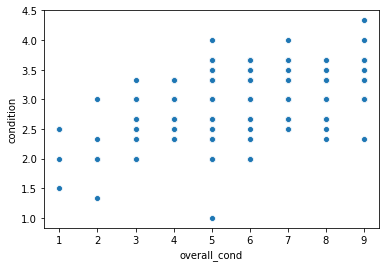

In [57]:
sns.scatterplot(x='overall_cond', y='condition', data=df)

Created a new quality column that's the mean of the others. Looks to slightly differ from overall quality, MAY be better, may be worse? We will see!

In [58]:
lots = df[df['lot_frontage'].isnull() == False]
lots_test = test[test['lot_frontage'].isnull() == False]

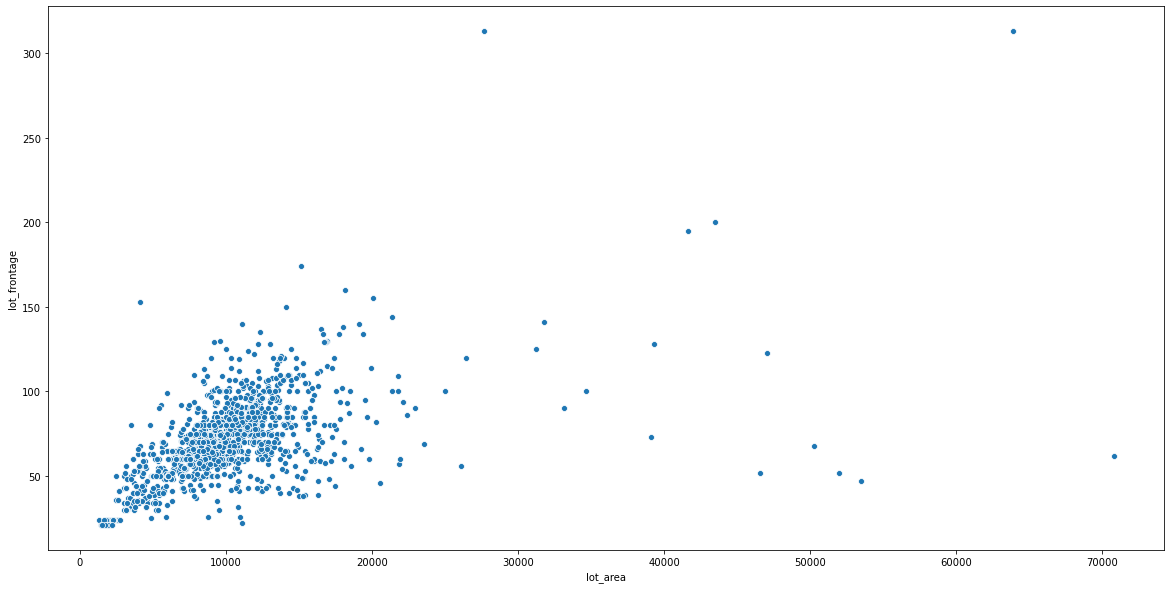

In [59]:
plt.figure(figsize=(20,10))
sns.scatterplot(y=lots['lot_frontage'], x=lots['lot_area'])

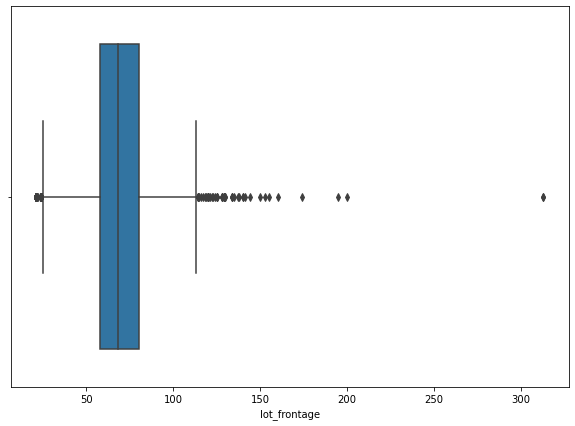

In [60]:
plt.figure(figsize=(10,7))
sns.boxplot(lots['lot_frontage'])

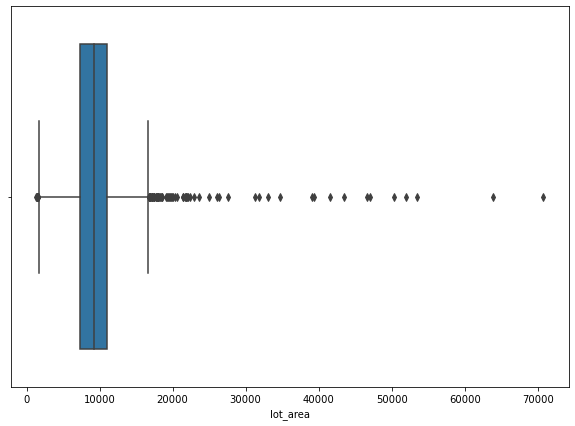

In [61]:
plt.figure(figsize=(10,7))
sns.boxplot(lots['lot_area'])

In [62]:
# lots.corr()

Checking correlation of lot related variables to see if I can drop any consdiering lot_frontage is missing quite a few values. Dropping lot frontage because lot_area has more explanatory power and they are linearly related 0.341842 vs	0.381088

In [63]:
df.drop('lot_frontage', axis=1, inplace=True)
test.drop('lot_frontage', axis=1, inplace=True)

In [64]:
df[['garage_cond', 'bsmt_qual', 'bsmt_cond', 'quality', 'overall_qual', 'overall_cond', 'condition', 'saleprice']].corr()

,garage_cond,bsmt_qual,bsmt_cond,quality,overall_qual,overall_cond,condition,saleprice
garage_cond,1.000000,0.139641,0.099021,0.201583,0.173415,0.042922,0.527712,0.152981
bsmt_qual,0.139641,1.000000,0.211760,0.859370,0.680455,-0.285688,0.121880,0.678307
bsmt_cond,0.099021,0.211760,1.000000,0.226428,0.190208,0.106619,0.661883,0.176309
quality,0.201583,0.859370,0.226428,1.000000,0.798247,-0.165208,0.220508,0.787670
overall_qual,0.173415,0.680455,0.190208,0.798247,1.000000,-0.082770,0.187286,0.800207
overall_cond,0.042922,-0.285688,0.106619,-0.165208,-0.082770,1.000000,0.337629,-0.097019
condition,0.527712,0.121880,0.661883,0.220508,0.187286,0.337629,1.000000,0.173780
saleprice,0.152981,0.678307,0.176309,0.787670,0.800207,-0.097019,0.173780,1.000000


In [65]:
garage_finishes = pd.get_dummies(df['garage_finish'], prefix='garage', drop_first=False)
garage_finishes_test = pd.get_dummies(test['garage_finish'], prefix='garage', drop_first=False)

In [66]:
df.garage_finish.value_counts()

Unf    849
RFn    579
Fin    509
Name: garage_finish, dtype: int64

In [67]:
test.garage_finish.value_counts()

Unf    382
RFn    233
Fin    218
Name: garage_finish, dtype: int64

In [68]:
garage_finishes.columns = garage_finishes.columns.str.lower()
garage_finishes_test.columns = garage_finishes_test.columns.str.lower()

In [69]:
garage_finishes.head()

,garage_fin,garage_rfn,garage_unf
0,0,1,0
1,0,1,0
2,0,0,1
3,1,0,0
4,0,0,1


In [70]:
df[['garage_cond', 'garage_finish', 'garage_yr_blt', 'garage_qual', 'garage_type']]

,garage_cond,garage_finish,garage_yr_blt,garage_qual,garage_type
0,3.0,RFn,1976.0,3.0,Attchd
1,3.0,RFn,1997.0,3.0,Attchd
2,3.0,Unf,1953.0,3.0,Detchd
3,3.0,Fin,2007.0,3.0,BuiltIn
4,3.0,Unf,1957.0,3.0,Detchd
...,...,...,...,...,...
2046,3.0,Fin,2007.0,3.0,Attchd
2047,3.0,Unf,1961.0,3.0,Detchd
2048,2.0,Unf,1929.0,2.0,Detchd
2049,3.0,Unf,1956.0,3.0,Attchd


In [71]:
df.garage_type.value_counts()

Attchd     1213
Detchd      536
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: garage_type, dtype: int64

In [72]:
test.garage_type.value_counts()

Attchd     518
Detchd     246
BuiltIn     53
Basment      9
CarPort      4
2Types       4
Name: garage_type, dtype: int64

## Creating dummy variables for garage and basement categories

I will start to construct dummy variables for all of my categorical variables starting with garage related variables.

In [73]:
garage_types = pd.get_dummies(df['garage_type'], prefix='garage')
garage_types_test = pd.get_dummies(test['garage_type'], prefix='garage')
#getting dummies for garage type variables

In [74]:
df = pd.concat([df, garage_types, garage_finishes], axis = 1)
test = pd.concat([test, garage_types_test, garage_finishes_test], axis = 1)
#concatenating new variables to dataset

In [75]:
df.drop(['garage_type', 'garage_finish'], axis=1, inplace=True)
test.drop(['garage_type', 'garage_finish'], axis=1, inplace=True)
#dropping old variables use to create dummies

In [76]:
df.columns = df.columns.str.lower()
test.columns = test.columns.str.lower()

In [77]:
df.head()

,id,pid,ms_subclass,ms_zoning,lot_area,street,alley,lot_shape,land_contour,utilities,...,condition,garage_2types,garage_attchd,garage_basment,garage_builtin,garage_carport,garage_detchd,garage_fin,garage_rfn,garage_unf
0,109,533352170,60,RL,13517,Pave,NaN,IR1,Lvl,AllPub,...,3.000000,0,1,0,0,0,0,0,1,0
1,544,531379050,60,RL,11492,Pave,NaN,IR1,Lvl,AllPub,...,3.000000,0,1,0,0,0,0,0,1,0
2,153,535304180,20,RL,7922,Pave,NaN,Reg,Lvl,AllPub,...,3.333333,0,0,0,0,0,1,0,0,1
3,318,916386060,60,RL,9802,Pave,NaN,Reg,Lvl,AllPub,...,3.000000,0,0,0,1,0,0,1,0,0
4,255,906425045,50,RL,14235,Pave,NaN,IR1,Lvl,AllPub,...,3.333333,0,0,0,0,0,1,0,0,1


In [78]:
df[['bsmt_exposure', 'bsmtfin_type_2', 'bsmtfin_type_1', 'bsmt_cond', 'bsmt_qual']].head()

,bsmt_exposure,bsmtfin_type_2,bsmtfin_type_1,bsmt_cond,bsmt_qual
0,No,Unf,GLQ,3.0,3.0
1,No,Unf,GLQ,3.0,4.0
2,No,Unf,GLQ,3.0,3.0
3,No,Unf,Unf,3.0,4.0
4,No,Unf,Unf,4.0,2.0


In [79]:
df.bsmt_exposure.value_counts()

No    1339
Av     288
Gd     203
Mn     163
Name: bsmt_exposure, dtype: int64

In [80]:
test.bsmt_exposure.value_counts()

No    567
Av    130
Gd     80
Mn     76
Name: bsmt_exposure, dtype: int64

In [81]:
exposures = pd.get_dummies(df.bsmt_exposure, prefix='bsmt_exposure')
exposures_test = pd.get_dummies(test.bsmt_exposure, prefix='bsmt_exposure')
#dummies created for bsmt_exposure category

In [82]:
exposures.columns = exposures.columns.str.lower()
exposures_test.columns = exposures_test.columns.str.lower()

In [83]:
df.bsmtfin_type_1.value_counts()

GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
Name: bsmtfin_type_1, dtype: int64

In [84]:
df.bsmtfin_type_2.value_counts()

Unf    1749
Rec      80
LwQ      60
BLQ      48
ALQ      35
GLQ      23
Name: bsmtfin_type_2, dtype: int64

Dummy variable created for basement categories below

In [85]:
bsmt_type1 = pd.get_dummies(df.bsmtfin_type_1, prefix="bsmt1")
bsmt_type2 = pd.get_dummies(df.bsmtfin_type_2, prefix="bsmt2")

bsmt_type1_test = pd.get_dummies(test.bsmtfin_type_1, prefix="bsmt1")
bsmt_type2_test = pd.get_dummies(test.bsmtfin_type_2, prefix="bsmt2")

In [86]:
bsmt_type1.columns = bsmt_type1.columns.str.lower()
bsmt_type2.columns = bsmt_type2.columns.str.lower()

bsmt_type1_test.columns = bsmt_type1_test.columns.str.lower()
bsmt_type2_test.columns = bsmt_type2_test.columns.str.lower()

In [87]:
df = pd.concat([df, bsmt_type1, bsmt_type2], axis = 1)
test = pd.concat([test, bsmt_type1_test, bsmt_type2_test], axis = 1)

In [88]:
df.drop(['bsmtfin_type_1', 'bsmtfin_type_2', 'bsmt_exposure'], axis=1, inplace=True)
test.drop(['bsmtfin_type_1', 'bsmtfin_type_2', 'bsmt_exposure'], axis=1, inplace=True)

In [89]:
df.bsmt_cond.value_counts()

3.0    1834
4.0      89
2.0      65
1.0       5
5.0       3
Name: bsmt_cond, dtype: int64

Basement condition and quality nulls filled with zeroes to be dropped later. Float converted to integer for presentation and ease of access.

In [90]:
df.bsmt_cond.fillna(0, inplace=True)
df.bsmt_qual.fillna(0, inplace=True)
df.bsmt_cond = df.bsmt_cond.astype(int)
df.bsmt_qual = df.bsmt_qual.astype(int)

test.bsmt_cond.fillna(0, inplace=True)
test.bsmt_qual.fillna(0, inplace=True)
test.bsmt_cond = test.bsmt_cond.astype(int)
test.bsmt_qual = test.bsmt_qual.astype(int)

In [91]:
df.bsmt_cond.value_counts()

3    1834
4      89
2      65
0      55
1       5
5       3
Name: bsmt_cond, dtype: int64

In [92]:
df.bsmt_qual.value_counts()

3    887
4    864
5    184
2     60
0     55
1      1
Name: bsmt_qual, dtype: int64

In [93]:
basement_condition = pd.get_dummies(df.bsmt_cond, prefix="bsmt_cond", drop_first=True)
basement_quality = pd.get_dummies(df.bsmt_qual, prefix="bsmt_qual", drop_first=True)

basement_condition_test = pd.get_dummies(test.bsmt_cond, prefix="bsmt_cond", drop_first=True)
basement_quality_test = pd.get_dummies(test.bsmt_qual, prefix="bsmt_qual", drop_first=True)
#basement quality and condition dummies created

In [94]:
df = pd.concat([df, basement_condition, basement_quality], axis = 1)
df.drop(['bsmt_cond', 'bsmt_qual'], axis=1, inplace=True)

test = pd.concat([test, basement_condition_test, basement_quality_test], axis = 1)
test.drop(['bsmt_cond', 'bsmt_qual'], axis=1, inplace=True)
#Basement_condition and quality variables added to dataset and original variables dropped

Null values filled to represent missingness as seen in the data dictionay and dummy variables created for garage and pool categories.

In [95]:
df.garage_cond.fillna(0, inplace=True)
df.garage_qual.fillna(0, inplace=True)
df.garage_cond = df.garage_cond.astype(int)
df.garage_qual = df.garage_qual.astype(int)
garage_condition = pd.get_dummies(df.garage_cond, prefix="garage_cond", drop_first=True)
garage_quality = pd.get_dummies(df.garage_qual, prefix="garage_qual", drop_first=True)

test.garage_cond.fillna(0, inplace=True)
test.garage_qual.fillna(0, inplace=True)
test.garage_cond = test.garage_cond.astype(int)
test.garage_qual = test.garage_qual.astype(int)
garage_condition_test = pd.get_dummies(test.garage_cond, prefix="garage_cond", drop_first=True)
garage_quality_test = pd.get_dummies(test.garage_qual, prefix="garage_qual", drop_first=True)

In [96]:
df.garage_cond.value_counts()

3    1868
0     114
2      47
4      12
1       8
5       2
Name: garage_cond, dtype: int64

In [97]:
df.garage_qual.value_counts()

3    1832
0     114
2      82
4      18
5       3
1       2
Name: garage_qual, dtype: int64

In [98]:
df = pd.concat([df, garage_condition, garage_quality], axis = 1)
df.drop(['garage_cond', 'garage_qual'], axis=1, inplace=True)

test = pd.concat([test, garage_condition_test, garage_quality_test], axis = 1)
test.drop(['garage_cond', 'garage_qual'], axis=1, inplace=True)

In [99]:
df.pool_qc.value_counts()

Gd    4
TA    2
Fa    2
Ex    1
Name: pool_qc, dtype: int64

In [100]:
test.pool_qc.value_counts()

Ex    3
TA    1
Name: pool_qc, dtype: int64

In [101]:
pools = pd.get_dummies(df.pool_qc, prefix="pool", drop_first=False)
df = pd.concat([df, pools], axis = 1)
df.columns = df.columns.str.lower()
df.drop(['pool_qc'], axis=1, inplace=True)

pools_test = pd.get_dummies(test.pool_qc, prefix="pool", drop_first=False)
test = pd.concat([test, pools_test], axis = 1)
test.columns = test.columns.str.lower()
test.drop(['pool_qc'], axis=1, inplace=True)

In [102]:
test.shape

(878, 120)

In [103]:
alleys = pd.get_dummies(df.alley, prefix="alley")
df = pd.concat([df, alleys], axis = 1)
df.drop(['alley'], axis=1, inplace=True)

alleys_test = pd.get_dummies(test.alley, prefix="alley")
test = pd.concat([test, alleys_test], axis = 1)
test.drop(['alley'], axis=1, inplace=True)

In [104]:
df.fireplace_qu.value_counts()

4.0    523
3.0    407
2.0     59
5.0     31
1.0     31
Name: fireplace_qu, dtype: int64

In [105]:
test.fireplace_qu.value_counts()

4.0    220
3.0    193
2.0     16
1.0     15
5.0     12
Name: fireplace_qu, dtype: int64

In [106]:
df.fireplace_qu.fillna(0, inplace=True)
df.fireplace_qu = df.fireplace_qu.astype(int)

test.fireplace_qu.fillna(0, inplace=True)
test.fireplace_qu = test.fireplace_qu.astype(int)

In [107]:
fireplace_qu = pd.get_dummies(df.fireplace_qu, prefix="fireplace_qu", drop_first=True)
fireplace_qu_test = pd.get_dummies(test.fireplace_qu, prefix="fireplace_qu", drop_first=True)

In [108]:
fireplace_qu.head()

,fireplace_qu_1,fireplace_qu_2,fireplace_qu_3,fireplace_qu_4,fireplace_qu_5
0,0,0,0,0,0
1,0,0,1,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [109]:
df = pd.concat([df, fireplace_qu], axis = 1)
test = pd.concat([test, fireplace_qu_test], axis = 1)

In [110]:
df['mas_vnr_area'].value_counts()

0.0      1216
120.0      11
176.0      10
200.0      10
180.0       9
         ... 
57.0        1
572.0       1
65.0        1
567.0       1
161.0       1
Name: mas_vnr_area, Length: 373, dtype: int64

In [111]:
df['mas_vnr_type'].value_counts()

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: mas_vnr_type, dtype: int64

In [112]:
df['mas_vnr_area'].fillna(0, inplace=True)
df['mas_vnr_type'].fillna('None', inplace=True)

test['mas_vnr_area'].fillna(0, inplace=True)
test['mas_vnr_type'].fillna('None', inplace=True)

In [113]:
df[df['bsmt_full_bath'].isnull()][['bsmt1_alq', 'bsmt1_blq', 'bsmt1_glq', 'bsmt1_lwq',
'bsmt1_rec', 'bsmt1_unf', 'bsmt2_alq', 'bsmt2_blq', 'bsmt2_glq', 'bsmt2_lwq', 'bsmt2_rec',
'bsmt2_unf', 'bsmt_cond_1', 'bsmt_cond_2', 'bsmt_cond_3', 'bsmt_cond_4',
'bsmt_cond_5', 'bsmt_qual_1', 'bsmt_qual_2', 'bsmt_qual_3', 'bsmt_qual_4',
'bsmt_qual_5', 'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf']]

,bsmt1_alq,bsmt1_blq,bsmt1_glq,bsmt1_lwq,bsmt1_rec,bsmt1_unf,bsmt2_alq,bsmt2_blq,bsmt2_glq,bsmt2_lwq,...,bsmt_cond_5,bsmt_qual_1,bsmt_qual_2,bsmt_qual_3,bsmt_qual_4,bsmt_qual_5,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf
616,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
1327,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN


In [114]:
df['bsmt_full_bath'].fillna(0, inplace=True)
df['bsmt_half_bath'].fillna(0, inplace=True)

test['bsmt_full_bath'].fillna(0, inplace=True)
test['bsmt_half_bath'].fillna(0, inplace=True)

In [115]:
missing = pd.concat([df.isnull().sum()[df.isnull().sum() != 0]\
                     .sort_values(ascending=False), 
                     ((df.isnull().sum()[df.isnull().sum() != 0]
                       .sort_values(ascending=False)/df.shape[0])*100)
                     .round(2)], axis=1)
missing.columns = ['Missing_Total', 'Percentage_Missing']
missing

,Missing_Total,Percentage_Missing
garage_yr_blt,114,5.56
total_inside_sf,1,0.05
garage_area,1,0.05
garage_cars,1,0.05
total_bsmt_sf,1,0.05
bsmt_unf_sf,1,0.05
bsmtfin_sf_2,1,0.05
bsmtfin_sf_1,1,0.05


In [116]:
df[df['garage_area'].isnull()]

,id,pid,ms_subclass,ms_zoning,lot_area,street,lot_shape,land_contour,utilities,lot_config,...,pool_fa,pool_gd,pool_ta,alley_Grvl,alley_Pave,fireplace_qu_1,fireplace_qu_2,fireplace_qu_3,fireplace_qu_4,fireplace_qu_5
1712,2237,910201180,70,RM,9060,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0


In [117]:
df[df['garage_cars'].isnull()]

,id,pid,ms_subclass,ms_zoning,lot_area,street,lot_shape,land_contour,utilities,lot_config,...,pool_fa,pool_gd,pool_ta,alley_Grvl,alley_Pave,fireplace_qu_1,fireplace_qu_2,fireplace_qu_3,fireplace_qu_4,fireplace_qu_5
1712,2237,910201180,70,RM,9060,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0


In [118]:
garages = ['garage_2types', 'garage_attchd', 'garage_basment', 'garage_builtin', 'garage_carport', 'garage_detchd',
'garage_fin', 'garage_rfn', 'garage_unf', 'garage_cond_1', 'garage_cond_2', 'garage_cond_3', 'garage_cond_4',
'garage_cond_5', 'garage_qual_1', 'garage_qual_2', 'garage_qual_3', 'garage_qual_4', 'garage_qual_5']

In [119]:
df[df['garage_area'].isnull()][garages]

,garage_2types,garage_attchd,garage_basment,garage_builtin,garage_carport,garage_detchd,garage_fin,garage_rfn,garage_unf,garage_cond_1,garage_cond_2,garage_cond_3,garage_cond_4,garage_cond_5,garage_qual_1,garage_qual_2,garage_qual_3,garage_qual_4,garage_qual_5
1712,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [120]:
df[df['garage_cars'].isnull()][garages]

,garage_2types,garage_attchd,garage_basment,garage_builtin,garage_carport,garage_detchd,garage_fin,garage_rfn,garage_unf,garage_cond_1,garage_cond_2,garage_cond_3,garage_cond_4,garage_cond_5,garage_qual_1,garage_qual_2,garage_qual_3,garage_qual_4,garage_qual_5
1712,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [121]:
df[df['bsmt_unf_sf'].isnull()]['saleprice']

1327    79000
Name: saleprice, dtype: int64

In [122]:
df.drop([1712], inplace=True) 

In [123]:
df[df['bsmt_unf_sf'].isnull()]['saleprice']

1327    79000
Name: saleprice, dtype: int64

In [124]:
basements = ['bsmt1_alq', 'bsmt1_blq', 'bsmt1_glq', 'bsmt1_lwq', 'bsmt1_rec',
'bsmt1_unf', 'bsmt2_alq', 'bsmt2_blq', 'bsmt2_glq', 'bsmt2_lwq', 'bsmt2_rec',
'bsmt2_unf', 'bsmt_cond_1', 'bsmt_cond_2', 'bsmt_cond_3',
'bsmt_cond_4', 'bsmt_cond_5', 'bsmt_qual_1', 'bsmt_qual_2', 'bsmt_qual_3',
'bsmt_qual_4', 'bsmt_qual_5']

#basement related categories

In [125]:
df[df['bsmt_unf_sf'].isnull()][basements]

,bsmt1_alq,bsmt1_blq,bsmt1_glq,bsmt1_lwq,bsmt1_rec,bsmt1_unf,bsmt2_alq,bsmt2_blq,bsmt2_glq,bsmt2_lwq,...,bsmt_cond_1,bsmt_cond_2,bsmt_cond_3,bsmt_cond_4,bsmt_cond_5,bsmt_qual_1,bsmt_qual_2,bsmt_qual_3,bsmt_qual_4,bsmt_qual_5
1327,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
df[df['total_bsmt_sf'].isnull()][basements]

,bsmt1_alq,bsmt1_blq,bsmt1_glq,bsmt1_lwq,bsmt1_rec,bsmt1_unf,bsmt2_alq,bsmt2_blq,bsmt2_glq,bsmt2_lwq,...,bsmt_cond_1,bsmt_cond_2,bsmt_cond_3,bsmt_cond_4,bsmt_cond_5,bsmt_qual_1,bsmt_qual_2,bsmt_qual_3,bsmt_qual_4,bsmt_qual_5
1327,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
df[df['bsmtfin_sf_2'].isnull()][basements]

,bsmt1_alq,bsmt1_blq,bsmt1_glq,bsmt1_lwq,bsmt1_rec,bsmt1_unf,bsmt2_alq,bsmt2_blq,bsmt2_glq,bsmt2_lwq,...,bsmt_cond_1,bsmt_cond_2,bsmt_cond_3,bsmt_cond_4,bsmt_cond_5,bsmt_qual_1,bsmt_qual_2,bsmt_qual_3,bsmt_qual_4,bsmt_qual_5
1327,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
df[df['bsmtfin_sf_1'].isnull()][basements]

,bsmt1_alq,bsmt1_blq,bsmt1_glq,bsmt1_lwq,bsmt1_rec,bsmt1_unf,bsmt2_alq,bsmt2_blq,bsmt2_glq,bsmt2_lwq,...,bsmt_cond_1,bsmt_cond_2,bsmt_cond_3,bsmt_cond_4,bsmt_cond_5,bsmt_qual_1,bsmt_qual_2,bsmt_qual_3,bsmt_qual_4,bsmt_qual_5
1327,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
df.fillna(0, inplace=True)

In [130]:
df.bedroom_abvgr.value_counts()

3    1107
2     544
4     265
1      75
5      41
6      12
0       5
8       1
Name: bedroom_abvgr, dtype: int64

In [131]:
len(df.columns)

132

In [132]:
test.shape

(878, 126)

In [133]:
df.shape

(2050, 132)

In [134]:
test.shape

(878, 126)

## Last dummy variables created

Dummy variables created for all of the remaining categorical variables. Those indicated above needing dropped are dropped from the dataframe to avoid multicolinearity of categorical variables in future modeling.

In [135]:
list = ['ms_subclass', 'ms_zoning', 'street', 'lot_shape', 'land_contour', 'utilities', 'lot_config',
'land_slope', 'neighborhood', 'condition_1', 'bldg_type', 'house_style', 'overall_qual', 'overall_cond', 'roof_style',
'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual', 'exter_cond', 'foundation',
'heating', 'heating_qc', 'electrical', 'kitchen_qual', 'functional',
'fireplace_qu', 'mo_sold', 'yr_sold', 'sale_type', 'condition_2', 'central_air']
#List of the last variables needing dummy encoding

In [136]:
for i in list:
    df = pd.concat([df, (pd.get_dummies(df[i], prefix=i, drop_first=True))], axis = 1)
#     df.drop(i, axis=1, inplace=True)
    test = pd.concat([test, (pd.get_dummies(test[i], prefix=i, drop_first=True))], axis = 1)
#     test.drop(i, axis=1, inplace=True)

In [137]:
df.drop('fence_no_fence', axis=1, inplace=True)
test.drop('fence_no_fence', axis=1, inplace=True)

In [138]:
df.paved_drive.value_counts()

Y    1860
N     151
P      39
Name: paved_drive, dtype: int64

In [139]:
df = pd.concat([df, (pd.get_dummies(df['paved_drive'], prefix='paved_drive', drop_first=False))], axis = 1)
df.drop(['paved_drive_N', 'paved_drive'], axis=1, inplace=True)

test = pd.concat([test, (pd.get_dummies(test['paved_drive'], prefix='paved_drive', drop_first=False))], axis = 1)
test.drop(['paved_drive_N', 'paved_drive'], axis=1, inplace=True)

In [140]:
df.columns = df.columns.str.lower()
test.columns = test.columns.str.lower()

In [141]:
new_list = ['roof_matl_metal', 'roof_matl_roll', 'exterior_1st_precast', 'exterior_2nd_other', 'exterior_2nd_precast',
'mas_vnr_type_cblock', 'heating_gasa', 'kitchen_qual_2', 'sale_type_vwd']

In [142]:
for i in new_list:
    df[i] = np.nan

In [143]:
df.fillna(0, inplace=True)
test.fillna(0, inplace=True)

In [144]:
df_missing = []
test_missing = []

for i in df.columns:
    if i in test.columns or i == 'saleprice':
        pass
    else:
        test_missing.append(i)
        
for i in test.columns:
    if i in df.columns:
        pass
    else:
        df_missing.append(i)

In [145]:
df_missing

[]

In [146]:
for i in test_missing:
    test[i] = np.nan

In [147]:
test.shape

(878, 350)

In [148]:
df.shape

(2050, 351)

In [149]:
test.fillna(0, inplace=True)

## Files saved for use in modeling

Test and training dataframes saved to CSV files for future modeling

In [150]:
df.to_csv('cleaned_ames_train_data.csv')

In [151]:
test.to_csv('cleaned_ames_test_data.csv')

In [152]:
df.isnull().sum().max()

0

In [153]:
len(df.columns)

351

In [154]:
test.shape

(878, 350)

In [155]:
df.yr_sold.value_counts()

2007    497
2009    446
2006    438
2008    435
2010    234
Name: yr_sold, dtype: int64

In [156]:
neighborhoods = df.groupby('neighborhood')['saleprice'].median().sort_values(ascending=False)
neighborhoods

neighborhood
StoneBr    322450
NridgHt    317500
NoRidge    300750
GrnHill    280000
Veenker    260000
ClearCr    225000
Somerst    224000
Timber     220000
CollgCr    200000
Crawfor    199500
Blmngtn    192250
Greens     190000
NWAmes     185000
SawyerW    181000
Gilbert    180750
Mitchel    160000
NPkVill    143000
NAmes      141000
Blueste    137500
Landmrk    137000
SWISU      136200
Sawyer     135000
BrkSide    128000
Edwards    125000
OldTown    120000
BrDale     105500
IDOTRR     101500
MeadowV     92450
Name: saleprice, dtype: int64

In [160]:
df[df['neighborhood'] == 'GrnHill']['gr_liv_area']

463     1502
1211    1295
Name: gr_liv_area, dtype: int64

In [ ]:
df[df['neighborhood'] == 'GrnHill']['gr_liv_area']

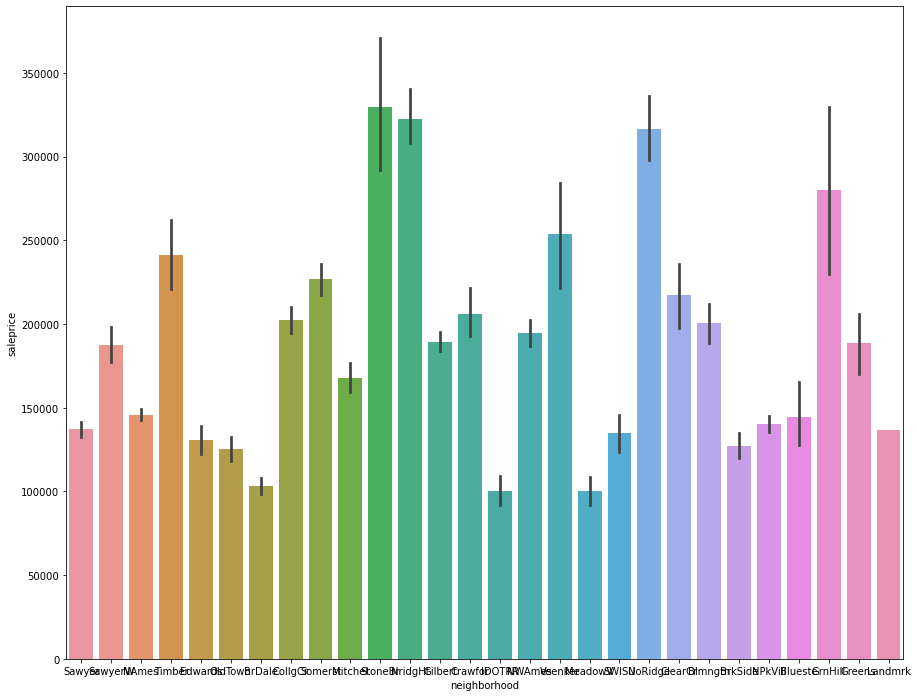

In [158]:
plt.figure(figsize=(15, 12))
sns.barplot(x=df['neighborhood'], y=df['saleprice'])

In [161]:
df.saleprice.mean()

181484.6092682927

In [163]:
df.saleprice.median()

162500.0